In [2]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [3]:
data_df = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [4]:
data_df.shape

(1473, 10)

In [5]:
data_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [6]:
data_df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1402.000000,1452.000000,1473.000000
mean,32.606277,3.254132,2.137814
std,8.274927,2.365212,0.864857
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,4.000000,3.000000
max,49.000000,16.000000,4.000000


In [7]:
data_df.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [71]:
data_df.isnull().sum()

Wife_age                     67
Wife_education                0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [9]:
data_df.shape

(1473, 10)

In [10]:
data_df.duplicated().sum()

80

In [11]:
data_df=data_df.drop_duplicates()

In [12]:
data_df.shape

(1393, 10)

In [13]:
data_df.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True) 
data_df.rename(columns = {'Media_exposure ':'Media_exposure'}, inplace = True) 

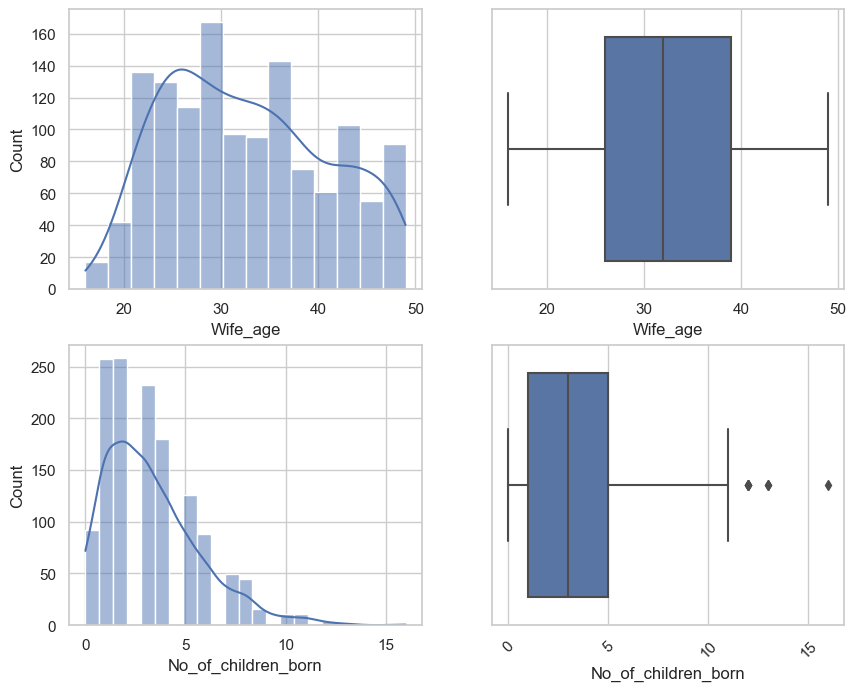

In [14]:
# plt.figure(figsize=(12,8))

# dfModifed=data_df.drop(['Wife_education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Standard_of_living_index','Media_exposure', 'Contraceptive_method_used'], axis=1)
# feature_list=dfModifed.columns
# for i in range(len(feature_list)):
#     plt.subplot(1,3,i+1)
#     sns.boxplot(y=dfModifed[feature_list[i]], data=dfModifed)
#     plt.title('boxPlot of {}'.format(feature_list[i]))
#     plt.tight_layout()

fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.histplot(data_df['Wife_age'], kde=True, ax=axes[0][0])

sns.boxplot(x='Wife_age', data=data_df, ax=axes[0][1])
sns.histplot(data_df['No_of_children_born'], kde=True, ax=axes[1][0])
sns.boxplot(x='No_of_children_born', data=data_df, ax=axes[1][1])
plt.xticks(rotation=45)
plt.show()

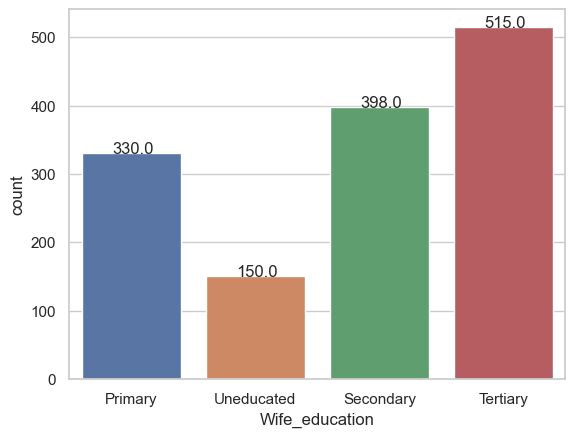

In [15]:
ax = sns.countplot(x='Wife_education', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

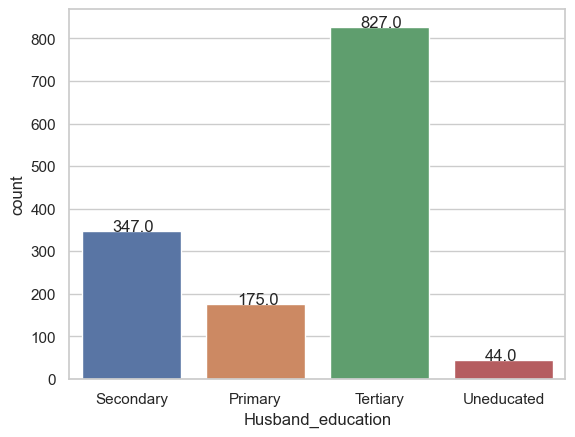

In [16]:
ax = sns.countplot(x='Husband_education', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

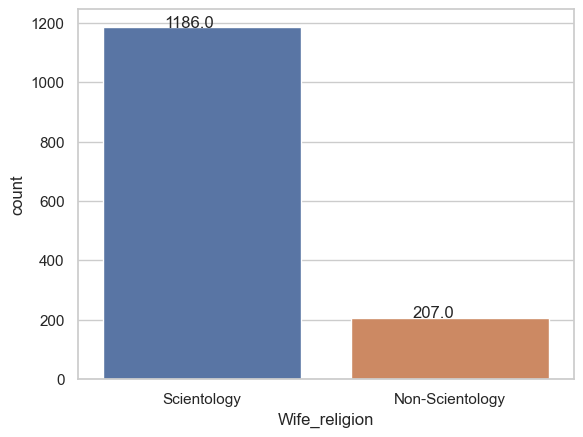

In [17]:
ax = sns.countplot(x='Wife_religion', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

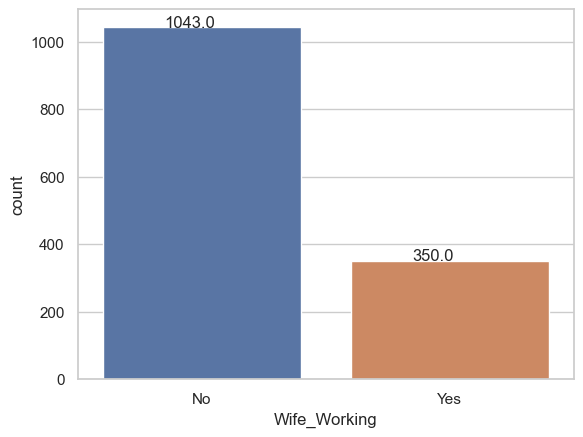

In [18]:
ax = sns.countplot(x='Wife_Working', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

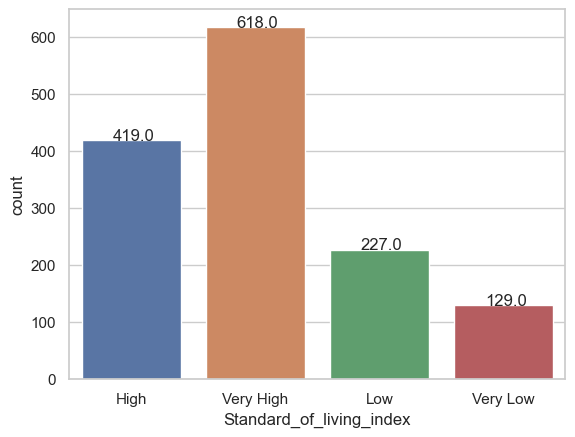

In [19]:
ax = sns.countplot(x='Standard_of_living_index', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

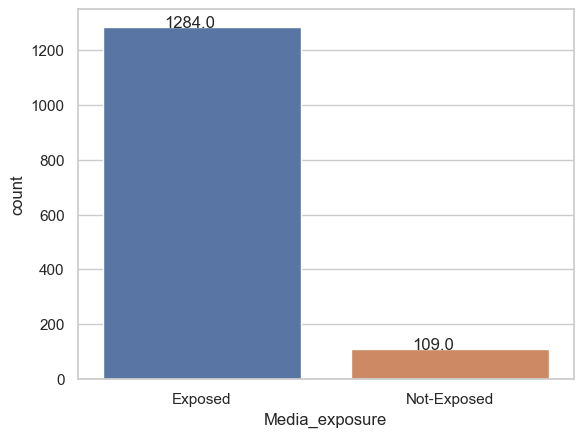

In [20]:
ax = sns.countplot(x='Media_exposure', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

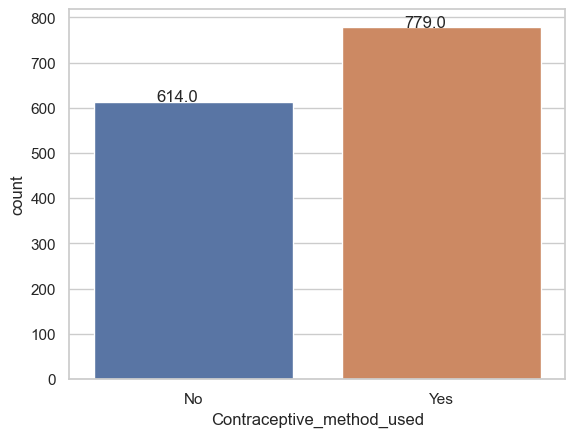

In [21]:
ax = sns.countplot(x='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_22756\3248151188.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

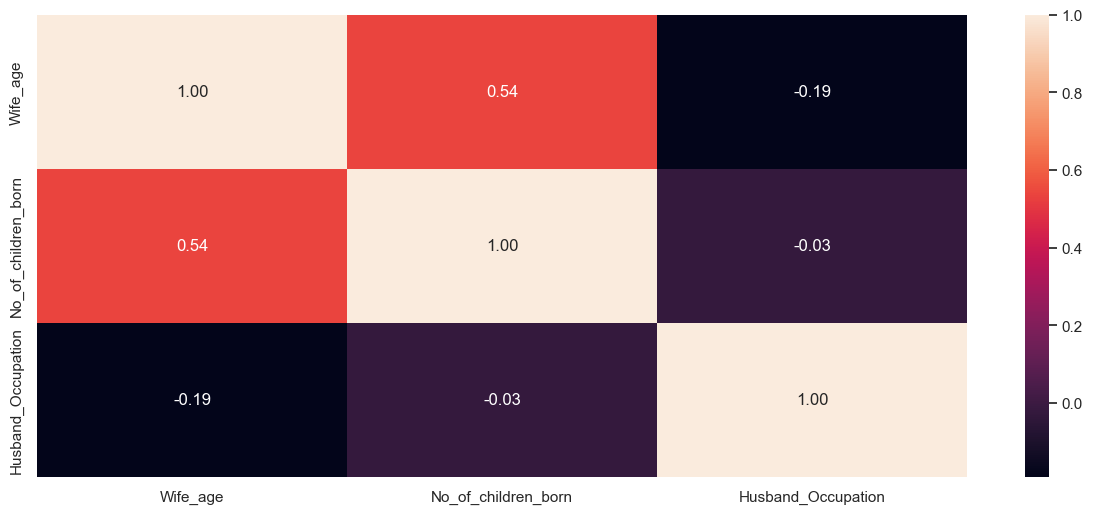

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(), annot=True, fmt=".2f")

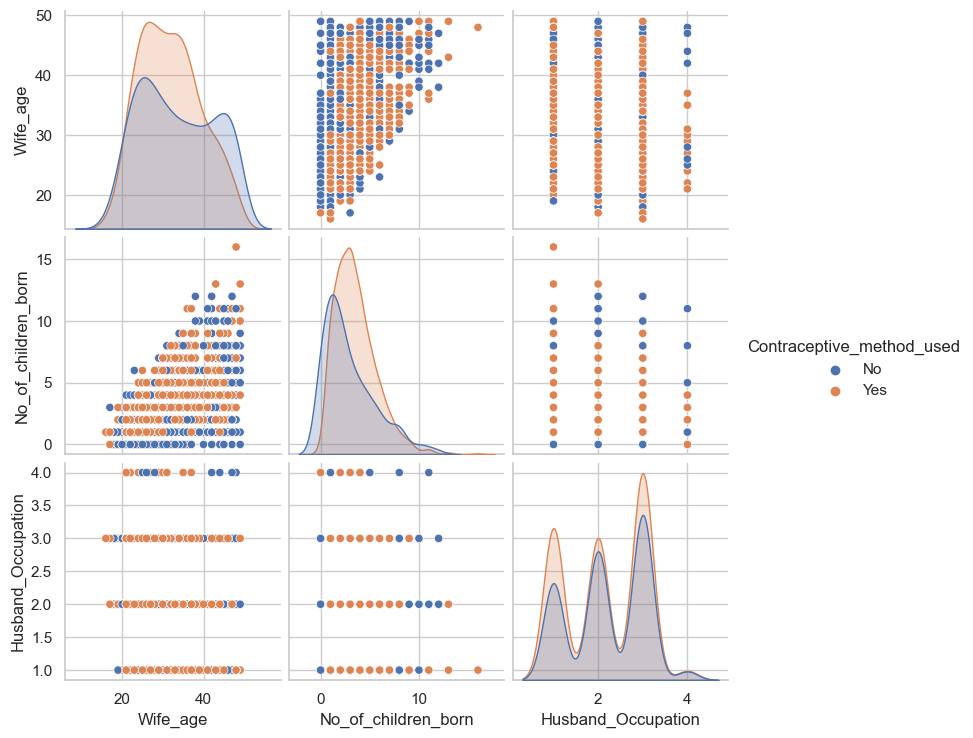

In [23]:
sns.pairplot(data_df, hue='Contraceptive_method_used')

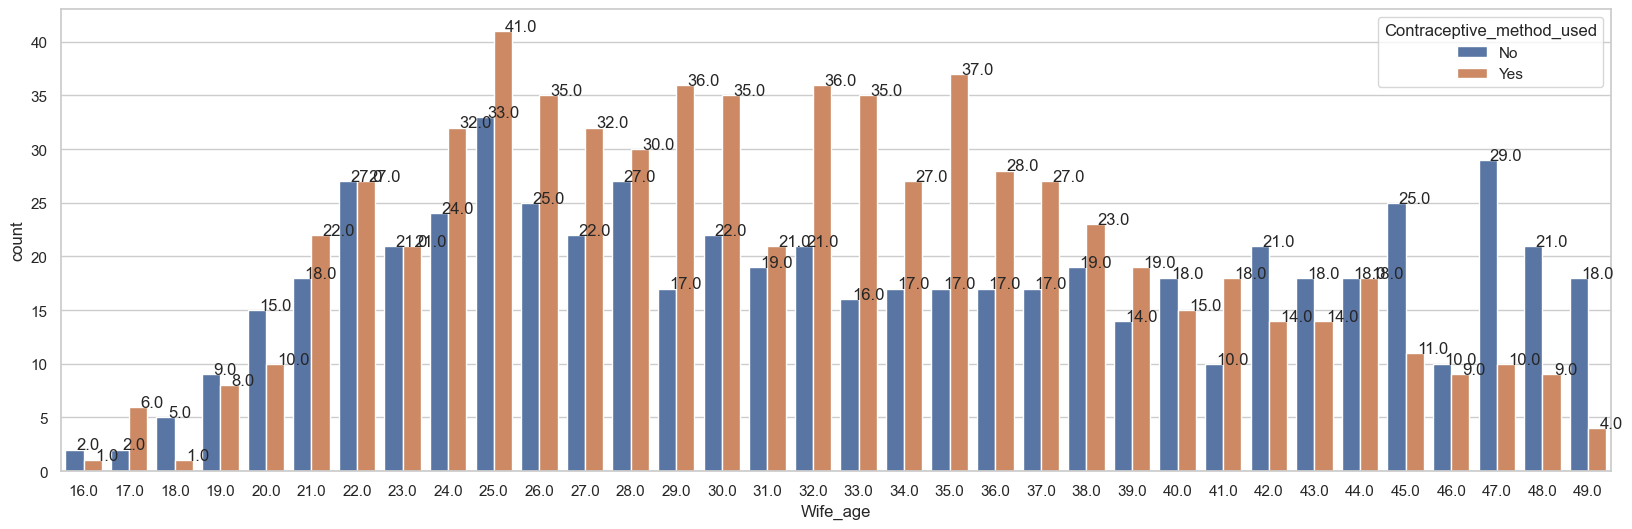

In [24]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='Wife_age',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

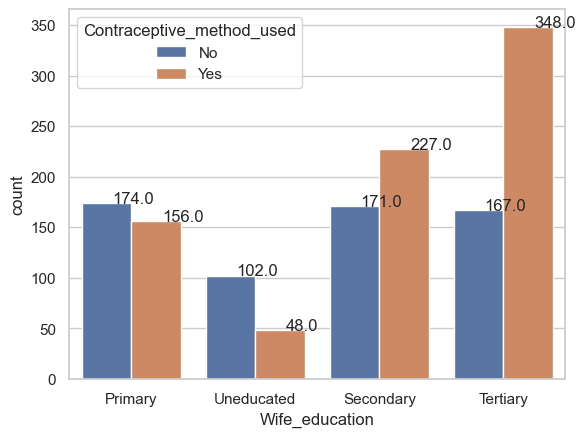

In [25]:
ax = sns.countplot(x='Wife_education',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

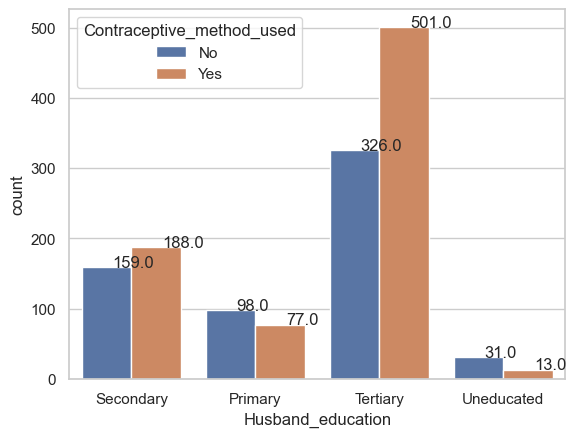

In [26]:
ax = sns.countplot(x='Husband_education',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

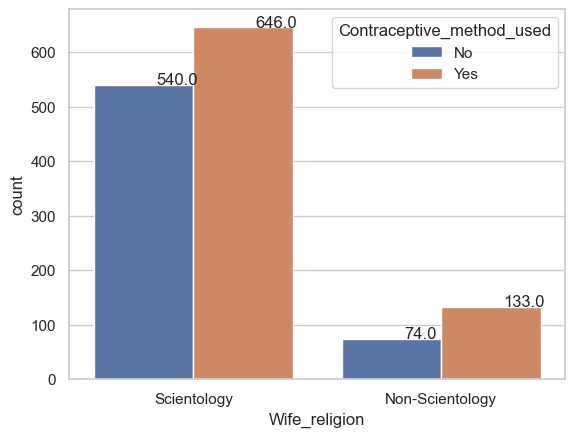

In [27]:
ax = sns.countplot(x='Wife_religion',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

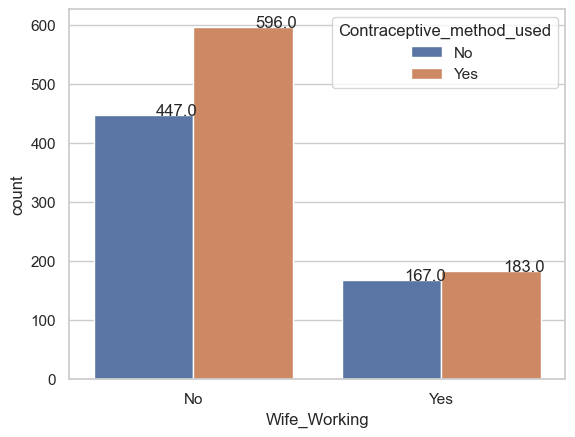

In [28]:
ax = sns.countplot(x='Wife_Working',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

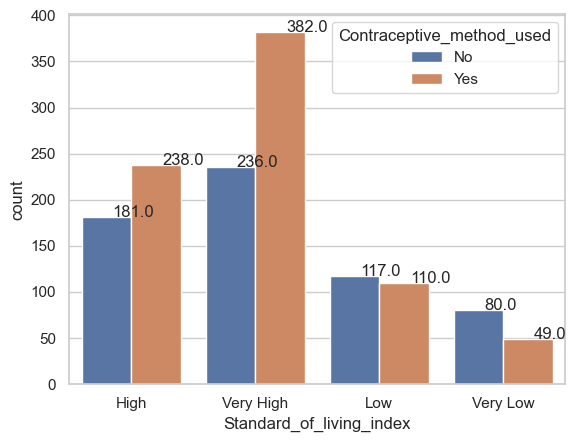

In [29]:
ax = sns.countplot(x='Standard_of_living_index',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

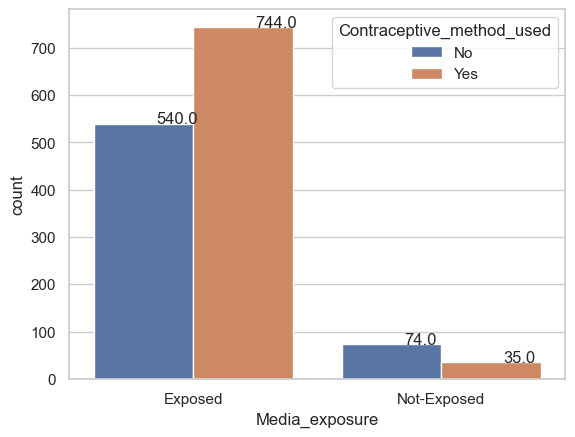

In [30]:
ax = sns.countplot(x='Media_exposure',hue='Contraceptive_method_used', data=data_df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [32]:
data_df['Wife_education'].unique()

array(['Primary', 'Uneducated', 'Secondary', 'Tertiary'], dtype=object)

In [33]:
data_df['Husband_education'].unique()

array(['Secondary', 'Primary', 'Tertiary', 'Uneducated'], dtype=object)

In [34]:
data_df['Wife_religion'].unique()

array(['Scientology', 'Non-Scientology'], dtype=object)

In [35]:
data_df['Wife_Working'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
data_df['Standard_of_living_index'].unique()

array(['High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [38]:
data_df['Media_exposure'].unique()

array(['Exposed', 'Not-Exposed'], dtype=object)

In [39]:
data_df['Contraceptive_method_used'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
data_df['Standard_of_living_index']=np.where(data_df['Standard_of_living_index'] =='Very High', 'VeryHigh', data_df['Standard_of_living_index'])
data_df['Standard_of_living_index']=np.where(data_df['Standard_of_living_index'] =='Very Low', 'VeryLow', data_df['Standard_of_living_index'])

In [38]:
#data_df.rename(columns = {'Media_exposure ':'Media_exposure'}, inplace = True) 

In [33]:
#data_df.rename(columns = {'Wife_ education':'Wife_education'}, inplace = True) 

In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_education             1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [42]:
data_df["Wife_education"] = data_df["Wife_education"].replace({'Uneducated':0, 'Primary': 1, 'Secondary':2, 'Tertiary':3})
# data_df['Wife_education']=np.where(data_df['Wife_education'] =='Primary', 1, data_df['Wife_education'])
# data_df['Wife_education']=np.where(data_df['Wife_education'] =='Secondary', 2, data_df['Wife_education'])
# data_df['Wife_education']=np.where(data_df['Wife_education'] =='Tertiary', 3, data_df['Wife_education'])
# data_df['Wife_education']=np.where(data_df['Wife_education'] =='Uneducated', 0, data_df['Wife_education'])

In [43]:
data_df['Wife_education'].unique()

array([1, 0, 2, 3], dtype=int64)

In [44]:
data_df["Husband_education"] = data_df["Husband_education"].replace({'Uneducated':0, 'Primary': 1, 'Secondary':2, 'Tertiary':3})
# data_df['Husband_education']=np.where(data_df['Husband_education'] =='Primary', 1, data_df['Husband_education'])
# data_df['Husband_education']=np.where(data_df['Husband_education'] =='Secondary', 2, data_df['Husband_education'])
# data_df['Husband_education']=np.where(data_df['Husband_education'] =='Tertiary', 3, data_df['Husband_education'])
# data_df['Husband_education']=np.where(data_df['Husband_education'] =='Uneducated', 0, data_df['Husband_education'])

In [45]:
data_df['Husband_education'].unique()

array([2, 1, 3, 0], dtype=int64)

In [48]:
data_df["Wife_religion"] = data_df["Wife_religion"].replace({'Scientology': 1, 'Non-Scientology':2})

In [56]:
data_df['Wife_religion'].unique()

array([1, 2], dtype=int64)

In [47]:
data_df["Wife_Working"] = data_df["Wife_Working"].replace({'Yes': 1, 'No':2})

In [57]:
data_df['Wife_Working'].unique()

array([2, 1], dtype=int64)

In [49]:
data_df["Standard_of_living_index"] = data_df["Standard_of_living_index"].replace({'VeryLow':1, 'Low': 2, 'High':3, 'VeryHigh':4})

In [50]:
data_df['Standard_of_living_index'].unique()

array([3, 4, 2, 1], dtype=int64)

In [51]:
data_df["Media_exposure"] = data_df["Media_exposure"].replace({'Exposed': 1, 'Not-Exposed':2})

In [52]:
data_df['Media_exposure'].unique()

array([1, 2], dtype=int64)

In [53]:
data_df["Contraceptive_method_used"] = data_df["Contraceptive_method_used"].replace({'Yes': 1, 'No':0})

In [54]:
data_df['Contraceptive_method_used'].unique()

array([0, 1], dtype=int64)

In [55]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_education             1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


In [58]:
data_df.head()

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,1,2,3.0,1,2,2,3,1,0
1,45.0,0,2,10.0,1,2,3,4,1,0
2,43.0,1,2,7.0,1,2,3,4,1,0
3,42.0,2,1,9.0,1,2,3,3,1,0
4,36.0,2,2,8.0,1,2,3,2,1,0


<AxesSubplot: >

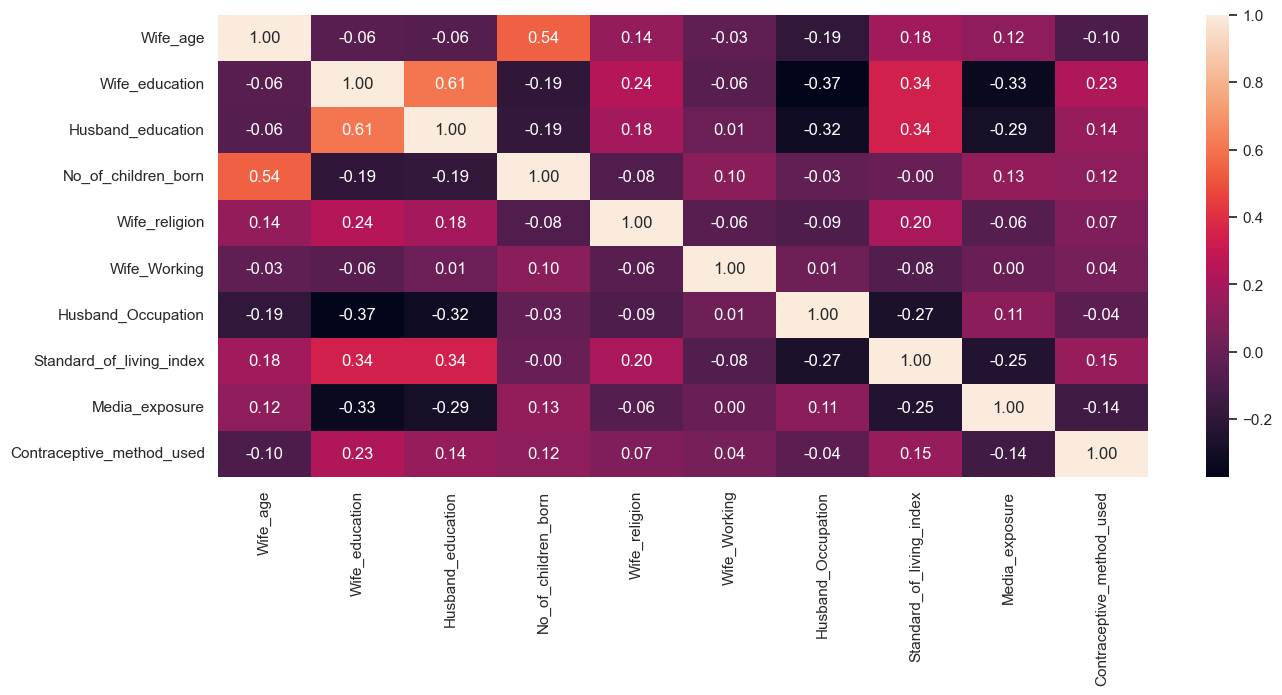

In [59]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(), annot=True, fmt=".2f")

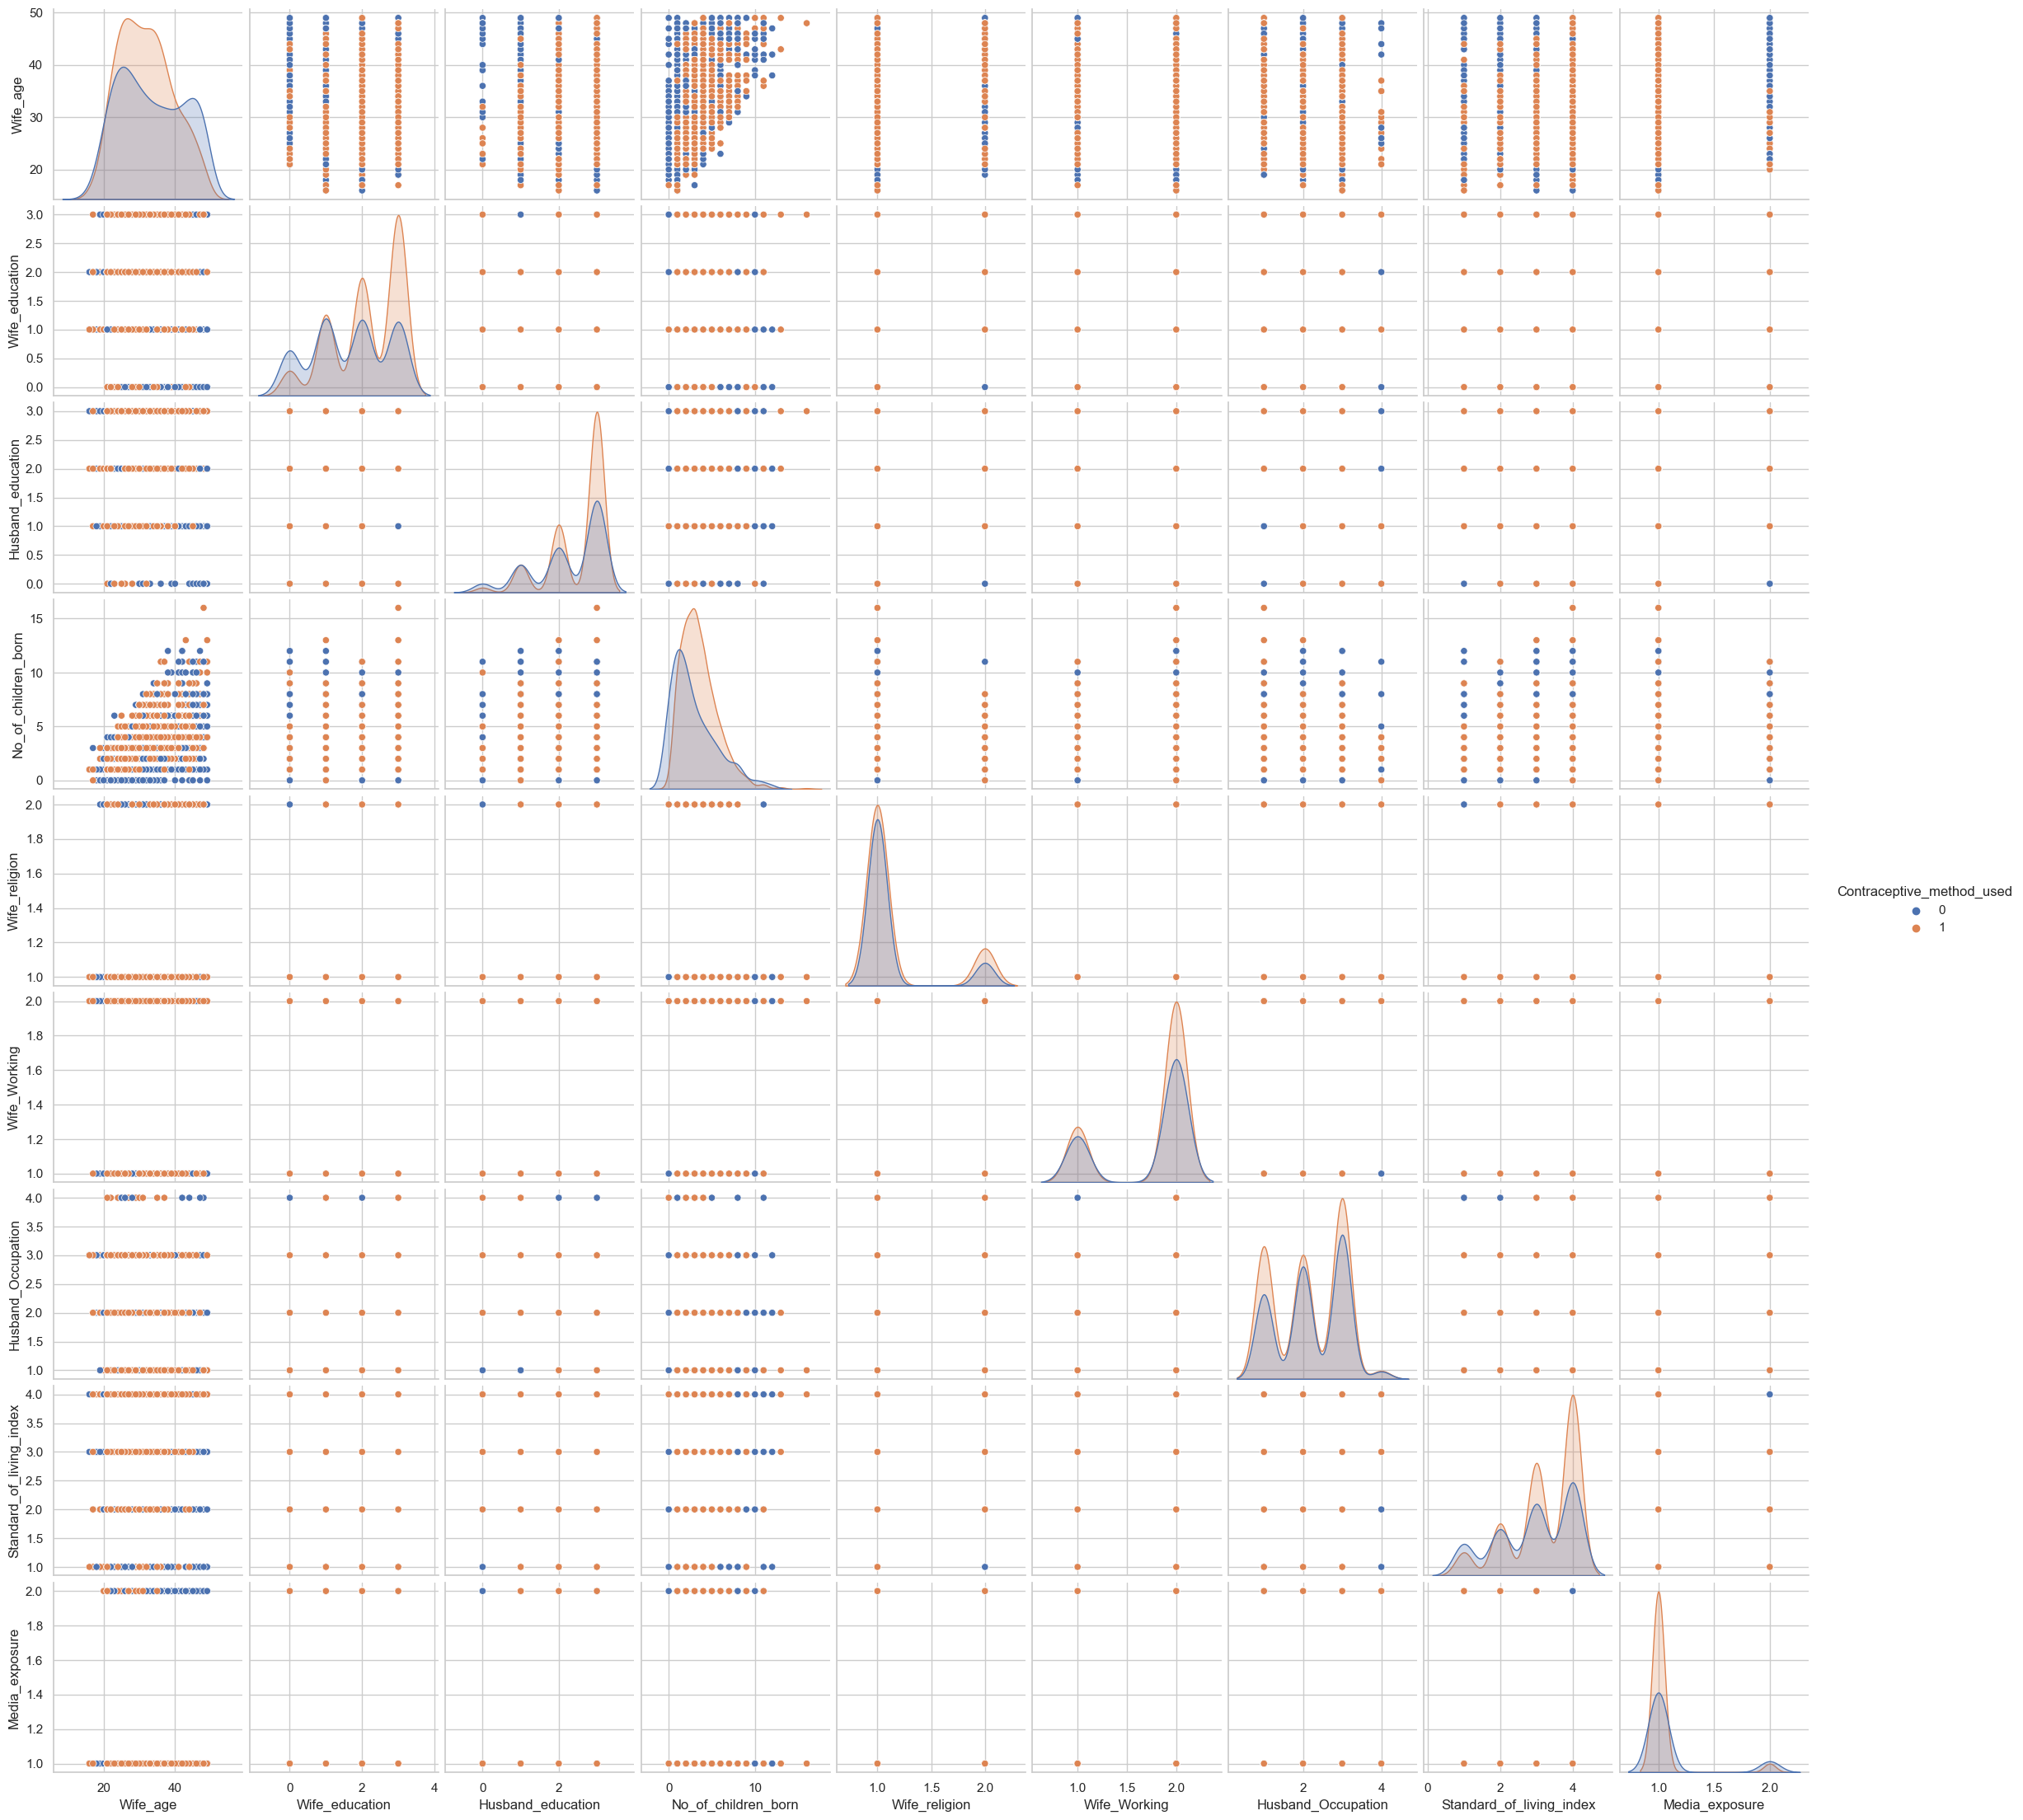

In [63]:
sns.pairplot(data_df, hue='Contraceptive_method_used', diag_kind = 'kde')

In [72]:
data_df['Wife_age'].fillna((data_df['Wife_age'].mean()), inplace=True)
data_df['No_of_children_born'].fillna((data_df['No_of_children_born'].mean()), inplace=True)

## Logistic Model 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve 

In [114]:
array = data_df.values
X = array[:,0:8] # select all rows and first 8 columns which are the attributes
Y = array[:,9]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [69]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [115]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6794258373205742
[[ 88  93]
 [ 41 196]]
              precision    recall  f1-score   support

         0.0       0.68      0.49      0.57       181
         1.0       0.68      0.83      0.75       237

    accuracy                           0.68       418
   macro avg       0.68      0.66      0.66       418
weighted avg       0.68      0.68      0.67       418



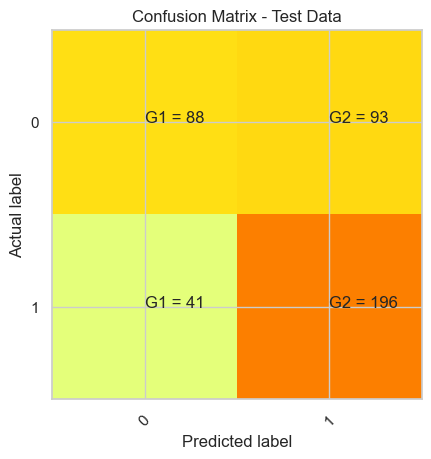

In [116]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [117]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.6512820512820513
[[216 217]
 [123 419]]
              precision    recall  f1-score   support

         0.0       0.64      0.50      0.56       433
         1.0       0.66      0.77      0.71       542

    accuracy                           0.65       975
   macro avg       0.65      0.64      0.64       975
weighted avg       0.65      0.65      0.64       975



In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

AUC: 0.696


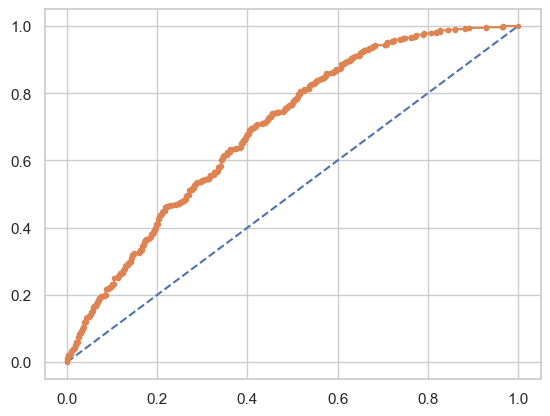

In [87]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.707


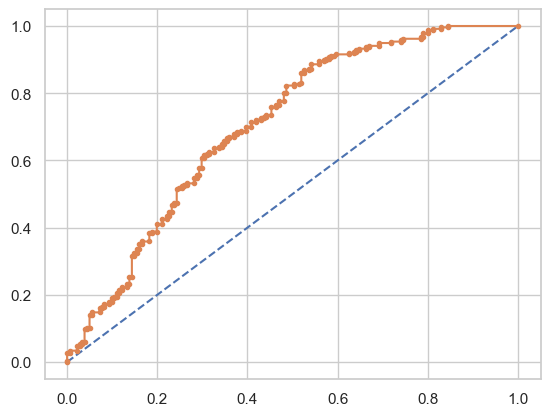

In [89]:
# AUC and ROC for the test data


# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## LDA

In [91]:
clf = LinearDiscriminantAnalysis()
modelLinear=clf.fit(X,Y)
modelLinear

LinearDiscriminantAnalysis()

In [92]:
# pred_class = model.predict(X)
# data_df['Prediction'] = pred_class 

In [93]:
#confusion_matrix(Y, pred_class)

array([[304, 310],
       [164, 615]], dtype=int64)

In [94]:
modelLinear.fit(X_train, y_train)
y_predict = modelLinear.predict(X_test)
model_score = modelLinear.score(X_test, y_test)
print(modelLinear)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

LinearDiscriminantAnalysis()
[[ 87  94]
 [ 39 198]]
              precision    recall  f1-score   support

         0.0       0.69      0.48      0.57       181
         1.0       0.68      0.84      0.75       237

    accuracy                           0.68       418
   macro avg       0.68      0.66      0.66       418
weighted avg       0.68      0.68      0.67       418



AUC: 0.696


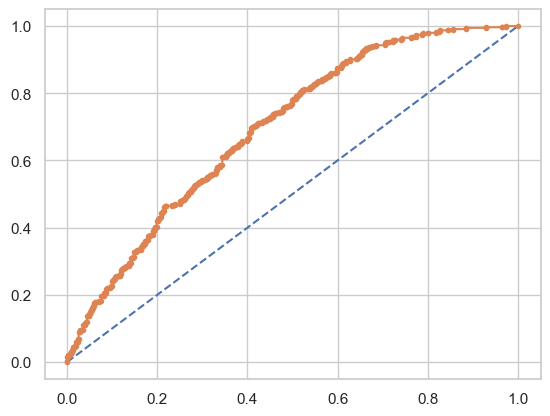

In [95]:
# AUC and ROC for the training data

# predict probabilities
probs = modelLinear.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.706


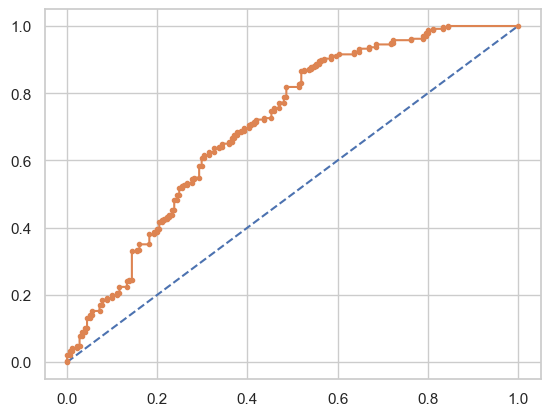

In [96]:
# AUC and ROC for the test data


# predict probabilities
probs = modelLinear.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Decision Tree CART

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt_model = DecisionTreeClassifier(criterion ='gini', random_state=1)

In [119]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [120]:
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(dt_model)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

DecisionTreeClassifier(random_state=1)
[[104  77]
 [ 87 150]]
              precision    recall  f1-score   support

         0.0       0.54      0.57      0.56       181
         1.0       0.66      0.63      0.65       237

    accuracy                           0.61       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.61      0.61      0.61       418



AUC: 0.999


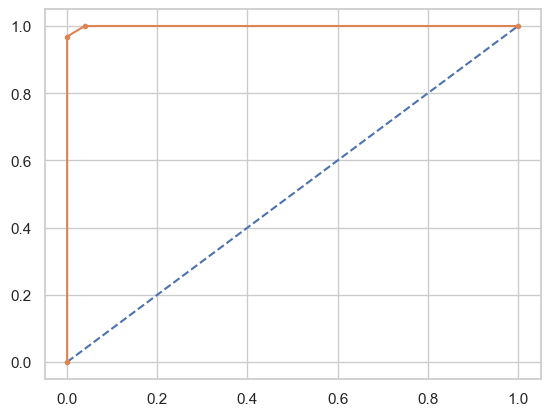

In [121]:
# AUC and ROC for the training data

# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.614


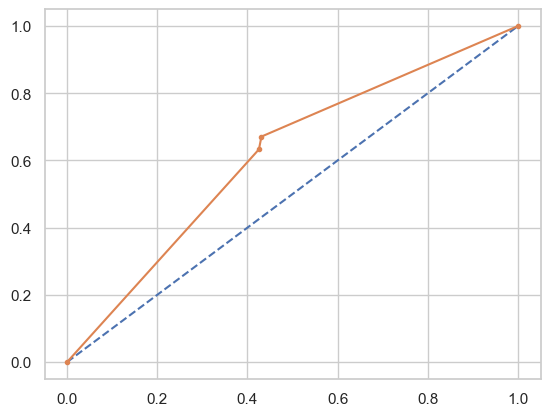

In [104]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [106]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

0.9825641025641025

In [107]:
dt_model.score(X_test,y_test) 

0.6076555023923444